In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [69]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [37]:
#Data Visualization
titanic_train.shape
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
#Data Visualization for survived
titanic_train['Survived'].value_counts()

#Only the catogories in this case 0,1
titanic_train['Survived'].value_counts().keys()

#Only the values in this case 549,342
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

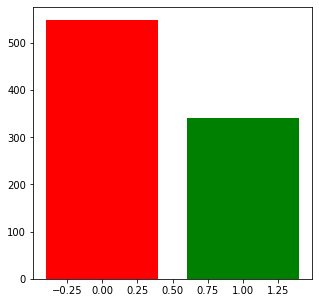

In [39]:
plt.figure(figsize=(5,5))
plt.bar( list(titanic_train['Survived'].value_counts().keys()), 
        list(titanic_train['Survived'].value_counts()), 
        color=['r', 'g'] )
plt.show()

In [6]:
#Data Visualization for Pclass
titanic_train['Pclass'].value_counts()

#Only the catogories in this case 3,1,2
titanic_train['Pclass'].value_counts().keys()

#Only the values in this case 491,216,184
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

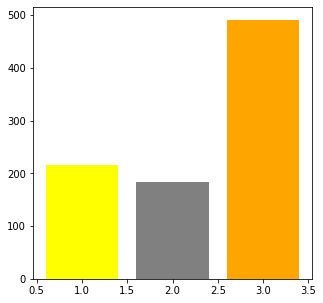

In [7]:
plt.figure(figsize=(5,5))
plt.bar( list(titanic_train['Pclass'].value_counts().keys()), list(titanic_train['Pclass'].value_counts()), color=['orange','yellow','grey'] )
plt.show()

In [8]:
#Data Visualization for Pclass
titanic_train['Sex'].value_counts()

#Only the catogories in this case male,female
titanic_train['Sex'].value_counts().keys()

#Only the values in this case 577,314
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

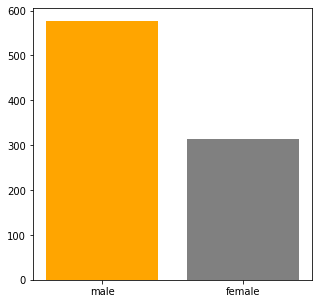

In [9]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()) , list(titanic_train['Sex'].value_counts()) , color=['orange', 'gray'])
plt.show()

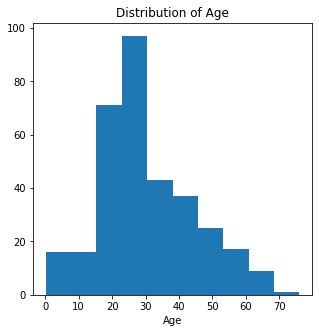

In [10]:
#Data Visualization for Age
plt.figure(figsize=(5,5))
plt.hist(titanic_test['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()


In [40]:
sum(titanic_train['Sex'].isnull())

0

In [41]:
sum(titanic_train['Survived'].isnull())

0

In [13]:
#building model
#Data pre-processing , Removing null values using dropna method
#titanic_train = titanic_train.dropna()
#sum(titanic_train['Age'].isnull())
#sum(titanic_train['Survived'].isnull())

In [47]:
titanic_train['Sex'] = [sub.replace('male', '1') for sub in titanic_train['Sex']]
titanic_train['Sex'] = [sub.replace('fe1', '0') for sub in titanic_train['Sex']]
titanic_train.head()

In [49]:
x_train = titanic_train[['Sex']] # Independent Variable
y_train = titanic_train[['Survived']] # Dependent Variable

In [33]:
### TESTING
#titanic_train.head()
#titanic_train.dtypes


#titanic_train['Sex'] = [sub.replace('fe1', '0') for sub in titanic_train['Sex']]

,Sex
0,1
1,1
2,1
3,1
4,1
...,...
886,1
887,1
888,1
889,1


In [18]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc = DecisionTreeClassifier()

In [51]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
#predicting values
sum(titanic_test['Sex'].isnull())

0

In [71]:
titanic_test['Sex'] = [sub.replace('male', '1') for sub in titanic_test['Sex']]
titanic_test['Sex'] = [sub.replace('fe1', '0') for sub in titanic_test['Sex']]

titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
x_test = titanic_test[['Sex']]

In [73]:
y_pred=dtc.predict(x_test)

In [74]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [75]:
submission = pd.DataFrame({'PassengerId':titanic_test['PassengerId'],'Survived':y_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [77]:
filename = 'TitanicDecisionTreeClassifier.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: TitanicDecisionTreeClassifier.csv


In [76]:
submission.shape

(418, 2)